### **Logistic Regression with L2 Regularization**

We discussed Logistic regression and its variation, Bayesian logistic regression, that adopts L2 regularization.

We are going to consider an extension of this model to allow different levels of regularization for different regression coefficients. Consider the constant term versus other features. The coefficient of the constant term is usually not regularized in logistic regression. It is because the constant term is related to the odds ratio when all features are zero, and regularizing this term will force the probability of the positive class given a zero feature vector to be 0.5, which may or may not be reasonable.

Another consideration is regarding the continuous-valued features and binary-valued features. We typically normalize continuous-valued features to have zero means and unit variances but keep binary-value features untouched. It makes sense to have a single regularization value for the continuous-valued features since all of them have been normalized. Similarly, if we do not have additional information, then all binary-valued features can have the same level of regularization. However, using the same regularization coefficient for the continuous-valued and binary-valued features may not be reasonable. That is, it is often beneficial to have a regularization coefficient for the continuous-valued features and another regularization coefficient for the binary-valued features.

The above discussion suggests that a more sophisticated way to regularize a logistic regression is to have three regularization coefficients: 0 for the constant,  $a_1$ for continuous-valued features, and $a_2$ for the binary-valued features. It is possible to further refine the regularization coefficients. However, hyper-parameter tuning associated with more regularization coefficients may be costly.

To achieve this goal, we are going to consider a variation of L2-regularized logistic regression that allows different levels of regularization for each coefficient. In the following discussion, we are going to use $X$
  to denote the feature matrix in the training data. The i-th row in  $X$
 ,  $x_i$ , is the feature vector for the i-th training data. The last column of  $X$ is one unless we do not include the constant term.

In this model, each regression coefficient may be associated with a different regularization coefficient. Bearing with the risk of ambigulity, we (again) use the scalar  $λ_i$ to denote the regularization coefficient for $w_i$
 . The vector  $w=[w_1,w_2,...,w_D]^T$ is the regression coefficient vector. Let  $Λ$  denote the diagonal matrix that have $λ_i$ at $Λ_{ii}$
 . Our new error function becomes:

$E(w)= \frac{1}{2}w^TΛw− \Sigma_{i=1}^n [t_n \, ln\,y_n+(1−t_n \, ln(1−y_n)]$,

where $\,y_n = \frac{1}{1+ exp(−w^Tx_n)}$

This model allows  $w_i$ to have regularization coefficient $λ_i$. If the constant term is the last element in  $w$, then setting $λ_D$ to $0$ allows us to free the constant term from regularization. We can set  $λ_i$ associated with continuous-valued features to one value, and elements associated with binary-value features to another value. This will achieve our goal of a more refined regularization structure.

Following the PRML textbook and the class discussion, we are going to train the model using the Newton-Raphson optimization method. In order to do so, you need to derive the gradient and hessian of  $E(w)$. Given the training dataset, we can optimize $w$ via

$w^{new}=w^{old}−H^{−1}∇E$

To do so, we need to have an initial vector of $w$ to kick start the iteration. One way to do this is to use the closed-form solution of ridge regression: $w=(X^T X + bI)^{−1}X^Tt$, where $t$ is the vector of training labels. Set $b$ to the average of  $λ_i$. Another way is to change the original L2 regularization term in ridge regression to  $\frac{1}{2}w^TΛw$ and derive the new closed-form solution that matches our model.

Create a Python class named mylogistic_l2 that performs model training and prediction.

The sample usage should be like the following:

$\,\,$*logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)*

$\,\,$*logic1.fit(X_train, Y_train)*

$\,\,$*ypred = logic1.predict(X_test)*

The first line is to create an object with the specified regularization coefficient vector, lambda_vec, and set the maximum number of iteration to 1000. The "tol" parameter sets the stopping condition for Newton-Raphson optimization. The iteration will stop if the improvement on the error function is less than  $10^{−5}$. The "add_intercept" option says that we need to add a column of ones to the end of X_train before model training. The length of lambda_vec, as a result, should match the number of columns after adding the "one column" when this option is turned on.

To simplify the discussion, we use 0.5 as the threshold for the positive case when making predictions. That is, the output of the last line should be a numpy array of 0 and 1s.

**Implementation Restrictions**

You are allowed to use the "building block" libraries including numpy and scipy in your own mylogistic_l2 class. You will receive a zero score if you adopted an existing logistic regression classifier in your answer. The input features and labels for the training method should be numpy arrays. The input features and output labels for the predict method should be numpy arrays.

**Dataset**

We are going to use to "Adult" dataset on the UCI machine learning reposition https://archive.ics.uci.edu/ml/datasets/Adult. The goal is to predict the label values of the income column, which can be either '>50K' or '<=50K.' The dataset had split the training and test data, and we are going to respect this particular train-test split in model testing.

To use this dataset in our model testing, you need to go through the data cleaning process so that the label value will be 1 for '>50K' and 0 otherwise. You should remove all rows with missing values. That is, if a row contains any missing values, remove that row. All features with discrete-values (for example, native-country and workclass) should be converted to "1-of-K" encoding. Include a particular feature value only if this unique value appears more than ten times in the training data.

#### **Q1.1 : Download the Adult dataset. Clean up the dataset and create x_train, y_train, x_test, y_test for training feature, training value, test feature, test label. All of these variables should be numpy arrays. Provide summary statistics for your training and test datasets so that TA can verify the correctness of your procedure.**

**<font color = blue>Step 1: Download Data**

After downloading the dataset from the website, I saved it as a CSV file and added a header row for ease of later use.

**<font color = blue>Step 2: Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("adult_data.csv")
test = pd.read_csv("adult_test.csv")

In [ ]:
train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


**<font color = blue> Step 3: Clean the missing values**

After opening the csv file, I noticed the presence of '?' in some data, indicating missing values. Therefore, the first step was to check each feature for the existence of missing values. And I decided to remove them if any.

In [ ]:
# Observe missing values in training dataset, " ?" = missing value
data_missing = train.isin([" ?"])
data_missing.sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [ ]:
# Observe missing values in testing dataset, " ?" = missing value
data_missing = test.isin([" ?"])
data_missing.sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

From the observations, I knew that the 'Worldclass,' 'Occupation,' and 'Country' columns in both the training and testing datasets contained missing values. Subsequently, I removed the data points with missing values.

In [ ]:
print("Original train size = ", train.shape)
train = train[(train['Workclass']!=" ?") & (train['Occupation']!=" ?") & (train['Country']!= " ?")]
print("Remove missing values train size = ", train.shape)
print(train.isin([" ?"]).sum())

Original train size =  (32561, 15)
Remove missing values train size =  (30162, 15)
Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64


In [ ]:
print("Original test size = ", test.shape)
test = test[(test['Workclass']!=" ?") & (test['Occupation']!=" ?") & (test['Country']!= " ?")]
print("Remove missing values test size = ", test.shape)
print(test.isin([" ?"]).sum())

Original test size =  (16281, 15)
Remove missing values test size =  (15060, 15)
Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64


In [ ]:
# reset index after deleting rows with missing values
train = train.reset_index().drop(['index'], axis=1)
test = test.reset_index().drop(['index'], axis=1)

Next, after splitting the data into x and y. For the target variable, I transformed them into binary values, where '>50K' was represented as 1, and '<=50K' as 0.

In [ ]:
x_train = train.drop('Target', axis=1)
y_train = train['Target']
x_test = test.drop('Target', axis=1)
y_test = test['Target']

In [ ]:
y_train.value_counts()

 <=50K    22654
 >50K      7508
Name: Target, dtype: int64

In [ ]:
y_test.value_counts()

 <=50K.    11360
 >50K.      3700
Name: Target, dtype: int64

In [ ]:
y_train = y_train.replace([" <=50K", " >50K"], [0, 1])
y_test = y_test.replace([" <=50K.", " >50K."], [0, 1])

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    22654
1     7508
Name: Target, dtype: int64
0    11360
1     3700
Name: Target, dtype: int64


**<font color = blue> Step 4: Go through the categorical features to determine the feature values**

In [ ]:
x_train.head(2)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


For categorical features 'Workclass,' 'Education,' 'Martial_Status,' 'Occupation,' 'Relationship,' 'Race,' 'Sex,' and 'Country,' I performed 1-to-K encoding by observing and selecting categories with counts greater than 10.

- Workclass

In [ ]:
# Observe the categories of Workclass
x_train['Workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Education

In [ ]:
x_train['Education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Martial_Status

In [ ]:
x_train['Martial_Status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Martial_Status, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Occupation

In [ ]:
x_train['Occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

To Remove 'Armed-Forces' since its counts was less than 10.

In [ ]:
delete_features = ['Occupation_ Armed-Forces']

- Relationship

In [ ]:
x_train['Relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Race

In [ ]:
x_train['Race'].value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Sex

In [ ]:
x_train['Sex'].value_counts()

 Male      20380
 Female     9782
Name: Sex, dtype: int64

Since there were no categories with counts less than 10, there was no need for further processing before one-hot-encoding.

- Country

In [ ]:
x_train['Country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

To remove 'Holand-Netherlands' since its counts was less than 10.

In [ ]:
delete_features.append('Country_ Holand-Netherlands')

**Do one-to-K encoding and then delete the columns in "delete_features" (i.e. those categories with counts <10)**

In [ ]:
x_train = pd.get_dummies(x_train).drop(delete_features, axis=1)
x_train.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Do one-to-K encoding on testing data, retaining only the columns that were the same with those in the training data.**

In [ ]:
x_test = pd.get_dummies(x_test)
x_test = x_test[x_train.columns]
x_test.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


<font color = blue>**Step 5: Summary of data**

In [ ]:
x_train[['Age','fnlwgt','Education_Num','Capital_Gain','Capital_Loss', 'Hours_per_week']].describe( )

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print("The number of 1s in each columns produced by one-to-K encoding:")
x_train.drop(['Age','fnlwgt','Education_Num','Capital_Gain','Capital_Loss', 'Hours_per_week'], axis=1).sum()

The number of 1s in each columns produced by one-to-K encoding:


Workclass_ Federal-gov                     943
Workclass_ Local-gov                      2067
Workclass_ Private                       22286
Workclass_ Self-emp-inc                   1074
Workclass_ Self-emp-not-inc               2499
Workclass_ State-gov                      1279
Workclass_ Without-pay                      14
Education_ 10th                            820
Education_ 11th                           1048
Education_ 12th                            377
Education_ 1st-4th                         151
Education_ 5th-6th                         288
Education_ 7th-8th                         557
Education_ 9th                             455
Education_ Assoc-acdm                     1008
Education_ Assoc-voc                      1307
Education_ Bachelors                      5044
Education_ Doctorate                       375
Education_ HS-grad                        9840
Education_ Masters                        1627
Education_ Preschool                        45
Education_ Pr

<font color = blue>**Step 6: Turn the dataframes into arrays**

In [ ]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(30162, 102) (15060, 102) (30162,) (15060,)


#### **Q1.2 Derive gradient and Hessian**

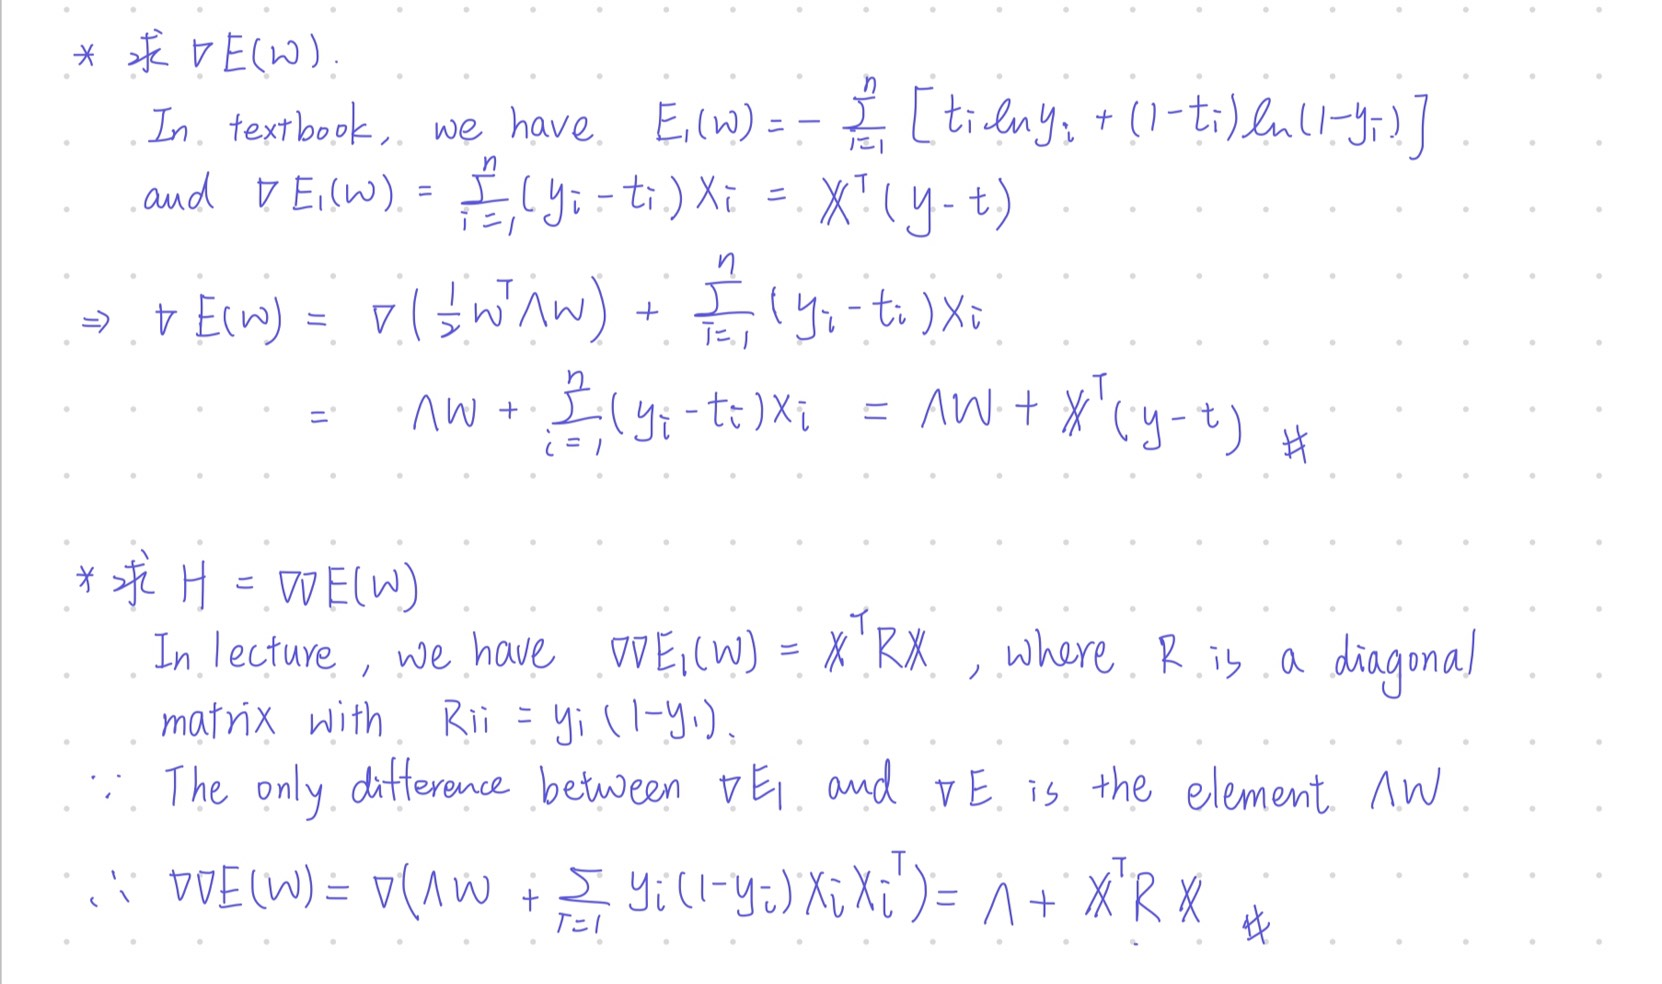

In [ ]:
from IPython.display import Image
Image("derive.jpg")

#### Q1.3 Create your mylogistic_l2 class

Show the learned  $w$  as well as test accuracy for the cases below. If  $w$  is too long for you, show selected  $w$  for continuous-valued, binary-valued, and the constant term.   

*   Case 1: lambda = 1 for all coefficients  
*   Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.  
*   Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.  





logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)   
logic1.fit(X_train, Y_train)   
ypred = logic1.predict(X_test)

The logic of the code is as follows:

Firstly, define functions to calculate the gradient and Hessian, as well as the loss function, for use in the class. During class initialization, store all variables and create a diagonal matrix with a large lambda value. When fitting, use the closed-form solution of Ridge regression as the initial $w$, then calculate the gradient and Hessian, plug them into the formula to compute the new $w$. Simultaneously, use the loss function to calculate the loss, and stop updating when the difference is less than the tolerance (tol) or the number of iterations exceeds the maximum iteration count (max_iter). The class's y is the predicted value obtained using $w$, $x$, and the sigmoid function, while $t$ represents the true values.

During the prediction, only the previously fitted $w$ and testing $x$ need to be input into the sigmoid function to obtain the predicted values for $y$.

In [ ]:
def Gradient(w, big_lambda, x, y, t):
    return big_lambda.dot(w) + x.T.dot(y-t)
def Hessian(w, big_lambda, x, y, t):
    n = len(y)
    R = np.zeros((n,n))
    for i in range(n):
        R[i][i] = y[i][0] * (1 - y[i][0])
    return big_lambda + x.T.dot(R).dot(x)
def Loss(y, t):
    loss = 0
    sample = len(y)
    for i in range(sample):
        loss += -( t[i][0] * np.log(y[i][0]) + (1-t[i][0]) * np.log( 1 - y[i][0]))
    return loss

In [ ]:
class mylogistic_l2:
    def __init__(self, reg_vec, max_iter, tol, add_intercept):
        self.reg_vec = reg_vec
        self.feature_dim = len(reg_vec)
        self.big_lambda = np.diag(self.reg_vec)
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    def fit(self, x_train, y_train):
        self.num = x_train.shape[0]
        self.x = x_train # shape = (num, feature_dim)
        self.t = y_train.reshape((1,len(y_train))).T # shape = (num, 1)
        self.b = np.average(self.reg_vec)

        if self.add_intercept:
            constant = np.ones( self.num )
            self.x = np.c_[self.x, constant] # shape = (num, feature_dim + 1)

        self.w = np.linalg.inv((self.x.T).dot(self.x) + (self.b)*np.identity(self.feature_dim)) \
        .dot(self.x.T).dot(self.t) # shape = (deature_dim, 1)

        self.y = np.zeros((self.num,1)) # shape = (num, 1)

        for i in range(self.num):
            self.y[i][0] = 1/(1 + np.exp(-self.w.T.dot(self.x[i])))

        self.iter_time = 0
        while (self.iter_time <= self.max_iter):
            cur_loss = Loss(self.y, self.t)
            grad = Gradient(self.w, self.big_lambda, self.x, self.y, self.t)
            hess = Hessian(self.w, self.big_lambda, self.x, self.y, self.t)
            new_w = self.w - np.linalg.inv(hess).dot(grad)
            # update y
            for i in range(self.num):
                self.y[i][0] = 1/(1 + np.exp(-new_w.T.dot(self.x[i])))
            new_loss = Loss(self.y, self.t)
            # update loss
            self.loss = new_loss
            # update w
            self.w = new_w
            if np.abs(new_loss - cur_loss) < self.tol:
                break
            self.iter_time += 1

    def predict(self, x_test):
        sample = x_test.shape[0]
        y_pre = np.zeros(sample)
        if self.add_intercept:
            constant = np.ones( sample )
            x_test = np.c_[x_test, constant]
        for i in range(sample):
            prob = 1/(1 + np.exp(-self.w.T.dot(x_test[i])))
            trans = lambda prob : 1 if prob > 0.5 else 0
            y_pre[i] = trans(prob)
        return y_pre

In [ ]:
def accuracy(y_pre, y):
    num = len(y_pre)
    num2 = len(y)
    if num != num2:
        print("Dimension error")
        return 1
    else:
        correct = 0
        for i in range(num):
            if y_pre[i] == y[i]:
                correct += 1
        return correct/num

##### Q1.3 Case 1: lambda = 1 for all coefficients

In [ ]:
lambda_vec = np.ones(x_train.shape[1] + 1)
reg1 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
reg1.fit(x_train, y_train)
pre_y1 = reg1.predict( x_test )
w1 = reg1.w
accu1 = accuracy(pre_y1, y_test)

In [ ]:
print("Learned w(transposed) = \n", w1.T)
print("Accuracy = ", accu1)

Learned w(transposed) = 
 [[ 2.48591297e-02  7.26281835e-07  1.85806163e-01  3.16590245e-04
   6.38679434e-04  2.90215841e-02  1.89694410e-01 -4.97719502e-01
  -3.10975203e-01 -1.29181492e-01 -7.94111558e-01 -6.18745004e-01
  -1.17270706e+00 -4.52249248e-01 -5.44907404e-01 -3.82721833e-01
  -9.99810311e-02 -2.62922226e-01 -6.29791390e-01 -4.96565840e-01
  -3.08326937e-01 -1.27584811e-01  1.28534378e-01  5.87953356e-01
  -2.50481307e-01  2.99991415e-01 -1.37579993e+00  6.82097030e-01
  -1.00989638e-01 -1.00975740e+00  1.19612260e+00  8.38966951e-01
  -9.56673074e-01 -1.50523219e+00 -1.08232392e+00 -8.14848370e-01
  -8.78492153e-02 -2.46913578e-02  7.15174653e-01 -1.06504054e+00
  -7.73348089e-01 -3.53722827e-01 -9.03671285e-01 -1.69395624e+00
   4.29670534e-01  4.99488476e-01  2.05962312e-01  5.68478621e-01
  -1.78947443e-01 -5.76254831e-01 -3.75781230e-01 -1.12608336e+00
  -1.50192093e+00 -5.01524893e-01  7.47819833e-01 -1.02439618e+00
  -2.92668734e-01 -6.35195702e-01 -8.96890178e-01 

##### Q1.3 Case 2: lambda = 1 for all but the intercept, no regularization for intercept term

In [ ]:
lambda_vec = np.ones(x_train.shape[1] + 1)
lambda_vec[-1] = 0
reg2 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
reg2.fit(x_train, y_train)
pre_y2 = reg2.predict( x_test )
w2 = reg2.w
accu2 = accuracy(pre_y2, y_test)

In [ ]:
print("Learned w(transposed) = \n", w2.T)
print("Accuracy = ", accu2)

Learned w(transposed) = 
 [[ 2.54336822e-02  7.50706804e-07  2.95324923e-01  3.17024478e-04
   6.39652126e-04  2.94914512e-02  7.05717318e-01  1.78026500e-02
   2.09126595e-01  3.82731145e-01 -2.79821711e-01 -1.04552949e-01
  -9.31003048e-01  9.08118762e-02 -1.06210390e-01 -5.68864880e-02
   7.06129017e-01  5.36014978e-01  1.16361327e-01  1.37527872e-01
  -4.01951496e-01 -1.13370201e-01 -7.43801938e-02  6.79669927e-02
  -1.95742294e-02 -1.15929727e-02 -1.15969699e+00  2.67049827e-01
   2.18010721e-02 -5.26538178e-01  1.61452758e+00  1.36751001e+00
  -4.92456781e-01 -1.01532722e+00 -6.05766415e-01 -3.41949002e-01
   1.64109182e-01  2.28422252e-01  9.64856017e-01 -8.17967488e-01
  -5.20782272e-01 -9.91243550e-02 -6.49283758e-01 -1.55300394e+00
   6.78427764e-01  7.51030497e-01  4.55411798e-01  8.18714335e-01
   7.31938653e-02 -4.21151206e-02  1.99456866e-01 -5.83542666e-01
  -9.36996740e-01  7.53014758e-02  1.28789619e+00 -3.72048376e-01
   3.94360616e-01  4.30693947e-02 -2.61235808e-01 

##### Q1.3 Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term

In [ ]:
feature = x_train.shape[1]
conti = range(6)
binary = range(6,feature)
constant = feature

In [ ]:
lambda_vec = np.ones(x_train.shape[1] + 1)
lambda_vec[binary] = 0.5
lambda_vec[-1] = 0
reg3 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
reg3.fit(x_train, y_train)
pre_y3 = reg3.predict( x_test )
w3 = reg3.w
accu3 = accuracy(pre_y3, y_test)

In [ ]:
print("Learned w(transposed) = \n", w3.T)
print("Accuracy = ", accu3)

Learned w(transposed) = 
 [[ 2.54757306e-02  7.51944312e-07  3.19092342e-01  3.17319913e-04
   6.40115460e-04  2.95135991e-02  7.66990116e-01  7.62915465e-02
   2.68338059e-01  4.43128005e-01 -2.20821080e-01 -4.63422172e-02
  -1.28758443e+00  2.18992475e-01 -2.26138731e-03  2.18816236e-02
   9.74981437e-01  7.54034100e-01  2.92224730e-01  2.93070078e-01
  -4.19612080e-01 -1.04346489e-01 -1.12963414e-01 -3.78240642e-02
   3.76517836e-02 -7.30516163e-02 -2.08394383e+00  1.86338344e-01
   5.48283061e-02 -5.72016463e-01  1.82571096e+00  1.39641689e+00
  -5.47067026e-01 -1.05936562e+00 -6.55642151e-01 -3.88036591e-01
   2.36234456e-01  3.00253533e-01  1.03825745e+00 -7.52669809e-01
  -4.53424415e-01 -2.69071693e-02 -5.82347571e-01 -2.00233647e+00
   7.51037233e-01  8.27361969e-01  5.28330008e-01  8.95057963e-01
   1.45241841e-01 -8.34438407e-02  2.32699144e-01 -5.92702337e-01
  -9.22764551e-01  1.11240624e-01  1.25497096e+00 -3.83664192e-01
   4.13058381e-01  4.13741738e-02 -2.63868161e-01 

#### Q1.4

Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let  $a_1$  and  $a_2$  denote the regularization coefficients for continuous-valued and binary-valued features. Search the best  $a_1$  and  $a_2$  and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyperparameters.

Approach: Consider the last 10% of the data as the tuning set, and use the initial 90% as the sub-training set. Use my class, grids, and both the tuning and sub-training sets to run the model, and follow the instructions in the assignment to fine-tune the lambda parameter.

##### Step 1: Choose a set of grids among a reasonable range.
I determined grids = np.array([0.01, 0.1, 0.25, 0.5, 1, 5, 10, 15, 20, 30, 40, 60, 80, 100])

In [ ]:
rows = x_train.shape[0]
cut = int(0.9*rows)
print("Sub-training set size = ", cut, ", and tuning set size = ", rows-cut)
x_sub_train = x_train[:cut]
y_sub_train = y_train[:cut]
x_tuning = x_train[cut:]
y_tuning = y_train[cut:]

Sub-training set size =  27145 , and tuning set size =  3017


In [ ]:
print(x_sub_train.shape)
print(y_sub_train.shape)
print(x_tuning.shape)
print(y_tuning.shape)

(27145, 102)
(27145,)
(3017, 102)
(3017,)


In [ ]:
def plot(grids, accuracy_list):
    plt.plot(grids, accuracy_list)
    plt.title("Accuracy wrt different lambdas")
    plt.xlabel('lambda')
    plt.ylabel('Accuracy')
    plt.show()
    plt.close()

##### Step 2: Conduct grid search with the constraint that  $a_1=a_2$. Record the best value  $a_1^*$ and $a_2^*$.

In [ ]:
grids = np.array([0.01, 0.1, 0.25, 0.5, 1, 5, 10, 15, 20, 30, 40, 60, 80, 100])
num = len(grids)

In [ ]:
loss_list = np.zeros(num)
accuracy_list = np.zeros(num)

In [ ]:
for i in range(num):
    lambda_vec = np.full((x_train.shape[1]+1, ), grids[i])
    lambda_vec[-1] = 0

    reg_a1a2 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
    reg_a1a2.fit(x_sub_train, y_sub_train)
    pre_y_a1a2 = reg_a1a2.predict( x_tuning )
    length = len(pre_y_a1a2)
    accuracy_list[i] = accuracy(pre_y_a1a2, y_tuning)
    loss_list[i] = reg_a1a2.loss

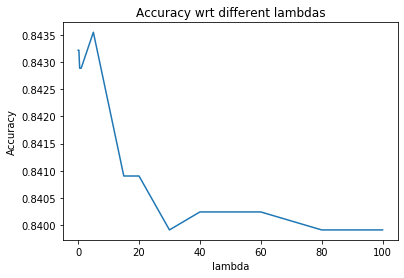

In [ ]:
plot(grids, accuracy_list)

In [ ]:
a1_star = a2_star = grids[np.argmax(accuracy_list)]
print("a1_star = a2_star = ", a1_star)

a1_star = a2_star =  5.0


From the above, it is known that when a1=a2, the best a1 = a2 =5 using grids.

##### Step 3: Fix  $a_1=a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$.

Set $a_1$=5 and search best $a_2$.

In [ ]:
lambda_vec = np.full((x_train.shape[1]+1, ), a1_star)
lambda_vec[-1] = 0
loss_list_a2 = np.zeros(len(grids))
accuracy_list_a2 = np.zeros(len(grids))
for i in range(len(grids)):
    lambda_vec[binary] = grids[i]

    reg_a2 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
    reg_a2.fit(x_sub_train, y_sub_train)
    pre_y_a2 = reg_a2.predict( x_tuning )
    length = len(pre_y_a2)
    loss_list_a2[i] = reg_a2.loss
    accuracy_list_a2[i] = (accuracy(pre_y_a2, y_tuning))

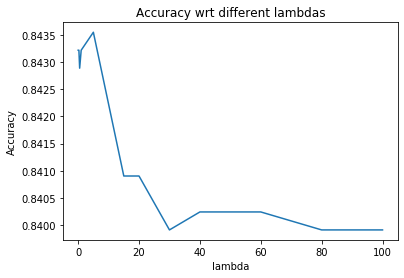

In [ ]:
plot(grids, accuracy_list_a2)

In [ ]:
a2_sel = grids[ np.argmax(accuracy_list_a2)]
print("New a2_star = ", a2_sel)

New a2_star =  5.0


##### Step 4: Fix $a_2=a_2^*$, and search $a_1$  for the best value.

In [ ]:
lambda_vec = np.full((x_train.shape[1]+1, ), a2_star)
lambda_vec[-1] = 0
loss_list_a1 = np.zeros(len(grids))
accuracy_list_a1 = np.zeros(len(grids))
for i in range(len(grids)):
    lambda_vec[conti] = grids[i]

    reg_a1 = mylogistic_l2(lambda_vec,1000,1e-5, 1)
    reg_a1.fit(x_sub_train, y_sub_train)
    pre_y_a1 = reg_a1.predict( x_tuning )
    length = len(pre_y_a1)
    loss_list_a1[i] = reg_a1.loss
    accuracy_list_a1[i] = accuracy(pre_y_a1, y_tuning)

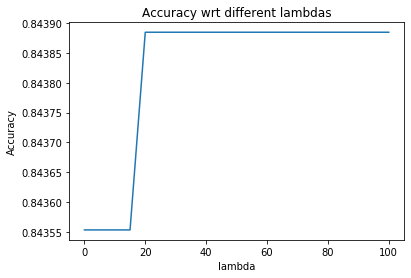

In [ ]:
plot(grids, accuracy_list_a1)

In [ ]:
accuracy_list_a1

array([0.8435532 , 0.8435532 , 0.8435532 , 0.8435532 , 0.8435532 ,
       0.8435532 , 0.8435532 , 0.8435532 , 0.84388465, 0.84388465,
       0.84388465, 0.84388465, 0.84388465, 0.84388465])

In [ ]:
loss_list_a1

array([8778.12322604, 8778.12323899, 8778.12326089, 8778.12329824,
       8778.12337615, 8778.12415181, 8778.12549492, 8778.12724115,
       8778.12937808, 8778.13477644, 8778.14159835, 8778.15917382,
       8778.18147641, 8778.2079506 ])

In [ ]:
a1_sel = grids[ np.argmax(accuracy_list_a1)]
print("New a1_star = ", a1_sel)

New a1_star =  20.0


##### Step 5: Use selected a1 and a2 to train the model and report the test accuracy

In [ ]:
print("Selected a1 = ", a1_sel)
print("Selected a2 = ", a2_sel)

Selected a1 =  20.0
Selected a2 =  5.0


In [ ]:
lambda_vec = np.zeros(x_train.shape[1]+1)
lambda_vec[conti] = a1_sel
lambda_vec[binary] = a2_sel

reg_final = mylogistic_l2(lambda_vec,1000,1e-5, 1)
reg_final.fit(x_train, y_train)
pre_y_final = reg_final.predict( x_test )

In [ ]:
loss_final = reg_final.loss
accu_final = accuracy(pre_y_final, y_test)
print("Final loss = ", loss_final)
print("Final accuracy = ", accu_final)

Final loss =  9771.675656017565
Final accuracy =  0.84867197875166


Eventually, we obtained selected $a_1$ = 20, $a_2$ =  5.0，and accuracy = 0.84867

##### Q1.5

Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression

Since the hyper-parameter lambda in sklearn's logistic regression corresponds to the reciprocal of the lambda in our formula, I first created a grids_inv array to store the reciprocals of the grids and then performed a grid search using the same approach as in Q1.4.

In [ ]:
grids_inv = 1./grids
accu_list = []

In [ ]:
for i in grids_inv:
    sk_reg = LogisticRegression(penalty='l2', tol=1e-5, C=i, solver = 'newton-cg', fit_intercept=True, max_iter=1000)
    sk_reg.fit(x_sub_train, y_sub_train)
    pre_y_sk = sk_reg.predict(x_tuning)
    accu_list.append( accuracy(pre_y_sk, y_tuning))

In [ ]:
best_lambda_inv = grids_inv[ np.argmax(accu_list) ]
best_lambda_inv

0.2

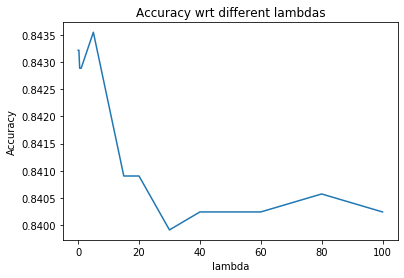

In [ ]:
plot(grids, accu_list)

In [ ]:
print("Best lambda = ", 1/best_lambda_inv)

Best lambda =  5.0


In [ ]:
sk_reg = LogisticRegression(penalty='l2', tol=1e-5, C=best_lambda_inv, solver = 'newton-cg',fit_intercept=True, max_iter=1000)
sk_reg.fit(x_train, y_train)
pre_y_sk_final = sk_reg.predict(x_test)

In [ ]:
acc = accuracy(pre_y_sk_final, y_test)
print("Accuracy = ", acc, " when lambda = ", 1/best_lambda_inv)

Accuracy =  0.84867197875166  when lambda =  5.0


In my own regressor, with a1 = 20, a2 = 5, and no regularization on the constant term, the achieved accuracy is 0.84867. Interestingly, the sklearn model, with lambda=5, also achieves the same accuracy of 0.84867.
While they are equally good, I find it peculiar because, in theory, if tuning is done based on different data types for lambda, there should be a better accuracy. I think the reason might be that, under the logistic regression model and the grids we set, it has already reached the optimal result, making the two models the same. Additionally, during tuning, it's noticeable that the accuracies on the tuning set for both models are quite similar. Hence, it's possible that my regressor with a1 and a2 only performs slightly better. And this minor improvement may not show on the testing set, leading to the final results being the same.